# BHARATH INTERNSHIP-DATA SCIENCE INTERN

# NAME-MUDDANA GANESH

# TASK-1 -STOCK PRICE PREDICTION

# Importing Libraries

In [1]:
#importing libraries to be used
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import MinMaxScaler 

# Loading The Data

In [2]:
data=pd.read_csv("ADP-Data.csv")

In [3]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


In [4]:
data.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
999,2022-01-24,383.910004,387.260010,351.459991,387.149994,387.149994,32346000
1000,2022-01-25,379.140015,387.709991,365.130005,366.420013,366.420013,15145800
1001,2022-01-26,378.269989,382.660004,356.619995,359.700012,359.700012,12684000
1002,2022-01-27,382.059998,394.799988,378.100006,386.700012,386.700012,24324700
1003,2022-01-28,386.760010,387.000000,372.079987,384.359985,384.359985,11966600
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400


# Insights

In [5]:
print("SHAPE OF THE DATA:",data.shape)

SHAPE OF THE DATA: (1009, 7)


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [7]:
data.count()

Date         1009
Open         1009
High         1009
Low          1009
Close        1009
Adj Close    1009
Volume       1009
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [9]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [11]:
data['Date'] = data['Date'].astype(str)
data['Date'] = pd.to_datetime(data['Date'].apply(lambda x: x.split()[0]))
data = data[['Date', 'Open', 'Close']]

In [12]:
data.set_index('Date',drop=True,inplace=True) 
data.head(10)

,Open,Close
Date,,
2018-02-05,262.000000,254.259995
2018-02-06,247.699997,265.720001
2018-02-07,266.579987,264.559998
2018-02-08,267.079987,250.100006
2018-02-09,253.850006,249.470001
2018-02-12,252.139999,257.950012
2018-02-13,257.290009,258.269989
2018-02-14,260.470001,266.000000
2018-02-15,270.029999,280.269989


In [13]:
data.columns

Index(['Open', 'Close'], dtype='object')

In [14]:
data.tail()

,Open,Close
Date,,
2022-01-31,401.970001,427.140015
2022-02-01,432.959991,457.130005
2022-02-02,448.250000,429.480011
2022-02-03,421.440002,405.600006
2022-02-04,407.309998,410.170013


# Data Visualisation

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Close'}>]], dtype=object)

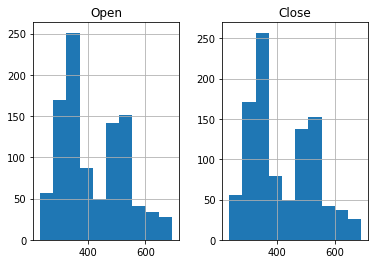

In [15]:
data.hist()

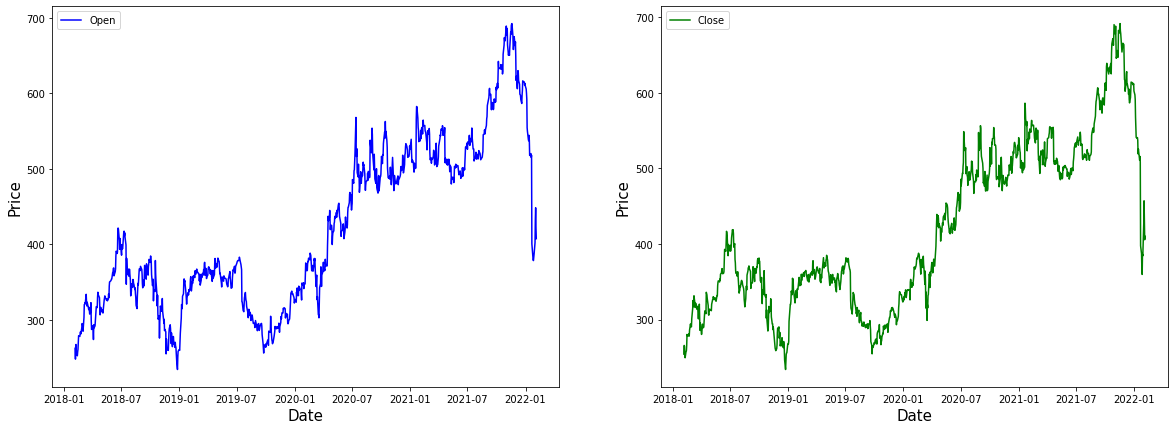

In [16]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(data['Open'],label='Open',color='blue')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(data['Close'],label='Close',color='green')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()


# Data Pre-processing

In [17]:
MMS = MinMaxScaler()
data[data.columns] = MMS.fit_transform(data)
data.head(10)

,Open,Close
Date,,
2018-02-05,0.061253,0.044516
2018-02-06,0.030059,0.069548
2018-02-07,0.071243,0.067015
2018-02-08,0.072334,0.035430
2018-02-09,0.043474,0.034053
2018-02-12,0.039744,0.052576
2018-02-13,0.050978,0.053275
2018-02-14,0.057915,0.070160
2018-02-15,0.078769,0.101330


In [18]:
training_size=round(len(data)*0.75)
training_size

757

In [19]:
print(data.index)

DatetimeIndex(['2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
               '2018-02-09', '2018-02-12', '2018-02-13', '2018-02-14',
               '2018-02-15', '2018-02-16',
               ...
               '2022-01-24', '2022-01-25', '2022-01-26', '2022-01-27',
               '2022-01-28', '2022-01-31', '2022-02-01', '2022-02-02',
               '2022-02-03', '2022-02-04'],
              dtype='datetime64[ns]', name='Date', length=1009, freq=None)


In [20]:
split_index = int(0.8 * len(data))
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]
print(train_data.shape, test_data.shape)

(807, 2) (202, 2)


In [21]:
def create_sequence(dataset):
  sequences = []
  labels = []
  start_idx = 0
  for stop_idx in range(50,len(dataset)):
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))

In [22]:
train_seq, train_label = create_sequence(train_data) 
test_seq, test_label = create_sequence(test_data)
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((757, 50, 2), (757, 2), (152, 50, 2), (152, 2))

# Creating a LSTM Model

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
model = Sequential()
model.add(LSTM(units=25, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))
model.add(Dropout(0.1)) 
model.add(LSTM(units=25))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 25)            2800      
                                                                 
 dropout (Dropout)           (None, 50, 25)            0         
                                                                 
 lstm_1 (LSTM)               (None, 25)                5100      
                                                                 
 dense (Dense)               (None, 2)                 52        
                                                                 
Total params: 7952 (31.06 KB)
Trainable params: 7952 (31.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.fit(train_seq, train_label, epochs=10,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/10
24/24 [==============================] - 2s 79ms/step - loss: 7.7960e-04 - mean_absolute_error: 0.0208 - val_loss: 0.0059 - val_mean_absolute_error: 0.0585
Epoch 2/10
24/24 [==============================] - 2s 76ms/step - loss: 7.1774e-04 - mean_absolute_error: 0.0198 - val_loss: 0.0071 - val_mean_absolute_error: 0.0655
Epoch 3/10
24/24 [==============================] - 2s 74ms/step - loss: 7.1149e-04 - mean_absolute_error: 0.0196 - val_loss: 0.0075 - val_mean_absolute_error: 0.0668
Epoch 4/10
24/24 [==============================] - 2s 74ms/step - loss: 7.2491e-04 - mean_absolute_error: 0.0200 - val_loss: 0.0053 - val_mean_absolute_error: 0.0549
Epoch 5/10
24/24 [==============================] - 2s 77ms/step - loss: 6.8354e-04 - mean_absolute_error: 0.0193 - val_loss: 0.0054 - val_mean_absolute_error: 0.0557
Epoch 6/10
24/24 [==============================] - 2s 76ms/step - loss: 8.0438e-04 - mean_absolute_error: 0.0209 - val_loss: 0.0074 - val_mean_absolute_error: 0.066

In [44]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

5/5 [==============================] - 0s 29ms/step


array([[0.6460299 , 0.6460167 ],
       [0.64366984, 0.6430882 ],
       [0.64612097, 0.64565283],
       [0.65602607, 0.6559948 ],
       [0.6582068 , 0.6588025 ]], dtype=float32)

In [45]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
test_inverse_predicted[:5]

array([[530.07947, 529.63293],
       [528.99756, 528.29224],
       [530.1212 , 529.4663 ],
       [534.662  , 534.201  ],
       [535.66174, 535.4864 ]], dtype=float32)

# Visualising Data vs Predicted Data

In [65]:

df1 = pd.concat([data.iloc[-152:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],
                                       index=data.iloc[-152:].index)], axis=1)

In [66]:
df1[['Open','Close']] = MMS.inverse_transform(df1[['Open','Close']])
df1.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2021-07-01,525.719971,533.539978,530.079468,529.632935
2021-07-02,535.500000,533.979980,528.997559,528.292236
2021-07-06,533.000000,541.640015,530.121216,529.466309
2021-07-07,544.239990,535.960022,534.661987,534.200989
2021-07-08,530.929993,530.760010,535.661743,535.486389


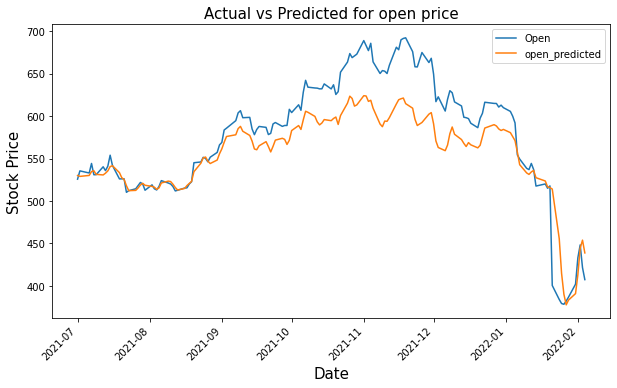

In [68]:
df1[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

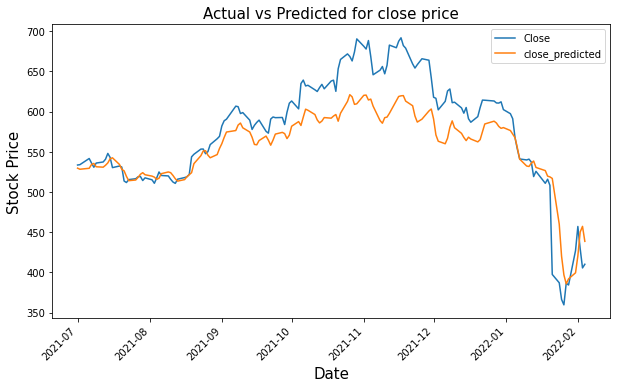

In [69]:
df1[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [70]:
print(data_subset.shape)
print(test_inverse_predicted.shape)

(152, 4)
(152, 2)


 # Forthcoming Prediction

In [71]:
data_subset

,Open,Close,open_predicted,close_predicted
Date,,,,
2021-07-01,0.636520,0.654551,530.079468,529.632935
2021-07-02,0.657854,0.655512,528.997559,528.292236
2021-07-06,0.652401,0.672244,530.121216,529.466309
2021-07-07,0.676919,0.659837,534.661987,534.200989
2021-07-08,0.647885,0.648479,535.661743,535.486389
...,...,...,...,...
2022-01-31,0.366577,0.422140,390.832947,399.530273
2022-02-01,0.434178,0.487648,413.004425,420.561615
2022-02-02,0.467531,0.427251,444.317871,450.267273


In [72]:
df2 = pd.concat([df1,pd.DataFrame(columns=df1.columns,
                                        index=pd.date_range(start=df1.index[-1], periods=11, freq='D'))],axis=0)
df2['2022-02-03':'2022-02-21']

,Open,Close,open_predicted,close_predicted
2022-02-03,421.440002,405.600006,453.847473,457.266388
2022-02-04,407.309998,410.170013,438.790161,438.657745
2022-02-04,NaN,NaN,NaN,NaN
2022-02-05,NaN,NaN,NaN,NaN
2022-02-06,NaN,NaN,NaN,NaN
2022-02-07,NaN,NaN,NaN,NaN
2022-02-08,NaN,NaN,NaN,NaN
2022-02-09,NaN,NaN,NaN,NaN
2022-02-10,NaN,NaN,NaN,NaN
2022-02-11,NaN,NaN,NaN,NaN


In [73]:
forthcoming_prediction = pd.DataFrame(columns=['open','close'],index=data_subset.index)
forthcoming_prediction.index=pd.to_datetime(forthcoming_prediction.index)

In [74]:
curr_seq = test_seq[-1:]
for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  forthcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)

1/1 [==============================] - 0s 23ms/step


In [75]:
forthcoming_prediction[['open','close']] = MMS.inverse_transform(forthcoming_prediction[['open','close']])

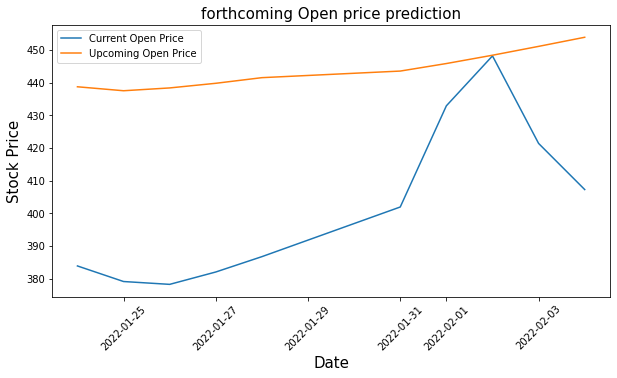

In [77]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Open'],label='Current Open Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming Open price prediction',size=15)
ax.legend()
fig.show()

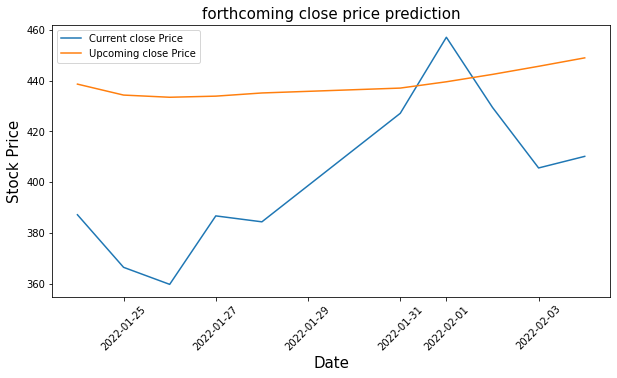

In [79]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df1.loc['2022-01-24':,'Close'],label='Current close Price')
ax.plot(forthcoming_prediction.loc['2022-01-24':,'close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('forthcoming close price prediction',size=15)
ax.legend()
fig.show()